<a href="https://colab.research.google.com/github/bellDataSc/Analises-Pixar-Films/blob/main/Analises_Pixar_Films.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
willianoliveiragibin_pixar_films_path = kagglehub.dataset_download('willianoliveiragibin/pixar-films')

print('Data source import complete.')


![cov](https://sm.ign.com/ign_br/screenshot/default/p1_ucd2.png)

<h1>🏆 Análise dos Filmes da Pixar (1995 - 2021) 🏆</h1>

## 📌Introdução

A Pixar é um dos estúdios de animação mais icônicos do cinema, responsável por sucessos como Toy Story, Procurando Nemo e Divertida Mente. Desde o lançamento do primeiro filme em 1995, a empresa revolucionou o mercado de animação com histórias cativantes e avanços tecnológicos.

Neste trabalho, exploramos um conjunto de dados que contém informações sobre os filmes da Pixar lançados entre 1995 e 2021. O objetivo é realizar análises exploratórias para entender tendências, padrões e insights sobre a evolução do estúdio ao longo dos anos.

Entre os aspectos analisados, destacamos:

O número de filmes lançados por década;
A evolução das avaliações no IMDb ao longo dos anos;
A média de duração dos filmes por década;
A distribuição de gêneros dentro do catálogo da Pixar.
Utilizando bibliotecas como pandas e matplotlib, buscamos apresentar uma visão geral dos dados e suas principais características. Este estudo pode ser útil para fãs do estúdio, pesquisadores de cinema e profissionais de análise de dados interessados na evolução da indústria de animação.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/pixar-films/pixar_films new.csv


In [ ]:
# Carregar os dados
df = pd.read_csv('/kaggle/input/pixar-films/pixar_films new.csv')

# Exibir as primeiras linhas do dataset
df.head()


,ID,film,film_rating,cinema_score,release_date,run_time,budget,box_office_us_canada,box_office_other,box_office_worldwide,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,imdb_score,imdb_counts
0,1,Toy Story,G,A,1995-11-22,81,30000000,223225679,171210907,394436586,100,96,95,26,8.3,1089101
1,2,A Bug's Life,G,A,1998-11-25,95,120000000,162798565,200460294,363258859,92,91,78,23,7.2,319596
2,3,Toy Story 2,G,A+,1999-11-24,92,90000000,245852179,265506097,511358276,100,172,88,34,7.9,630573
3,4,"Monsters, Inc.",G,A+,2001-11-02,92,115000000,255873250,272900000,528773250,96,199,79,35,8.1,1000657
4,5,Finding Nemo,G,A+,2003-05-30,100,94000000,339714978,531300000,871014978,99,270,90,38,8.2,1132877


In [ ]:
# Informações gerais sobre o dataset
df.info()

# Estatísticas descritivas das colunas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28 non-null     int64  
 1   film                    28 non-null     object 
 2   film_rating             28 non-null     object 
 3   cinema_score            25 non-null     object 
 4   release_date            28 non-null     object 
 5   run_time                28 non-null     int64  
 6   budget                  28 non-null     int64  
 7   box_office_us_canada    28 non-null     int64  
 8   box_office_other        28 non-null     int64  
 9   box_office_worldwide    28 non-null     int64  
 10  rotten_tomatoes_score   28 non-null     int64  
 11  rotten_tomatoes_counts  28 non-null     int64  
 12  metacritic_score        28 non-null     int64  
 13  metacritic_counts       28 non-null     int64  
 14  imdb_score              28 non-null     floa

,ID,run_time,budget,box_office_us_canada,box_office_other,box_office_worldwide,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,imdb_score,imdb_counts
count,28.000000,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,2.800000e+01
mean,14.500000,100.392857,1.553929e+08,2.475444e+08,3.611199e+08,6.086643e+08,88.357143,273.821429,78.142857,43.464286,7.542857,5.256077e+05
std,8.225975,8.047725,5.382092e+07,1.631609e+08,2.300110e+08,3.826497e+08,13.447330,84.248773,12.408821,9.558716,0.658522,3.688713e+05
min,1.000000,81.000000,0.000000e+00,9.461540e+05,2.041436e+07,2.181336e+07,40.000000,91.000000,57.000000,23.000000,6.100000,1.270450e+05
25%,7.750000,95.000000,1.200000e+08,1.540453e+08,2.069555e+08,3.787627e+08,79.750000,220.000000,68.250000,37.000000,7.175000,1.955322e+05
50%,14.500000,100.000000,1.750000e+08,2.305457e+08,3.218588e+08,5.338782e+08,94.500000,266.000000,79.500000,41.000000,7.550000,3.958430e+05
75%,21.250000,104.250000,2.000000e+08,3.046819e+08,5.086871e+08,8.253837e+08,97.000000,324.000000,88.500000,52.000000,8.100000,8.385082e+05
max,28.000000,118.000000,2.000000e+08,6.529802e+08,1.045051e+09,1.698031e+09,100.000000,459.000000,96.000000,59.000000,8.400000,1.226415e+06


## Número de Filmes por Década
Este gráfico de barras mostra quantos filmes a Pixar lançou em cada década, usando a coluna release_date.

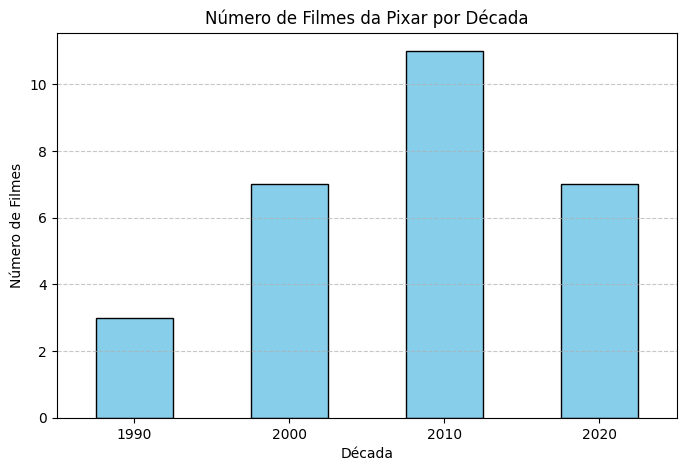

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter release_date para datetime e extrair o ano
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['Year'] = df['release_date'].dt.year

# Criar uma nova coluna para a década
df['Decada'] = (df['Year'] // 10) * 10

# Contagem de filmes por década
df_decada = df['Decada'].value_counts().sort_index()

# Plotar gráfico de barras
plt.figure(figsize=(8, 5))
df_decada.plot(kind='bar', color='skyblue', edgecolor='black')

# Configuração do gráfico
plt.xlabel('Década')
plt.ylabel('Número de Filmes')
plt.title('Número de Filmes da Pixar por Década')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()


## Evolução das Avaliações IMDb
Este gráfico de linha mostra como as avaliações dos filmes (imdb_score) mudaram ao longo dos anos.

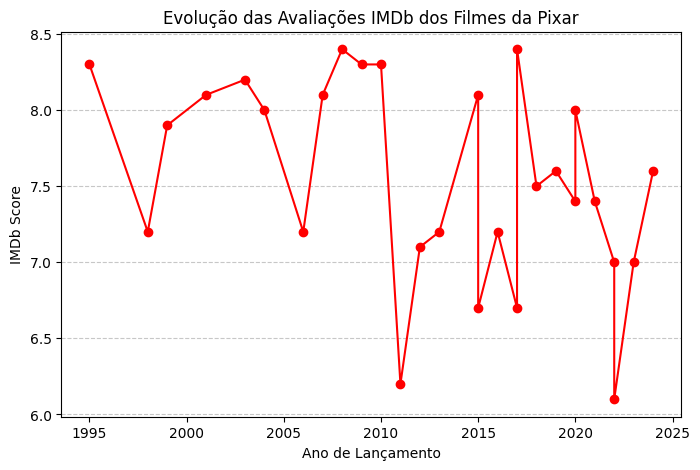

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Ordenar os dados por ano
df_sorted = df.sort_values(by='Year')

# Criar o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(df_sorted['Year'], df_sorted['imdb_score'], marker='o', linestyle='-', color='red')

# Configuração do gráfico
plt.xlabel('Ano de Lançamento')
plt.ylabel('IMDb Score')
plt.title('Evolução das Avaliações IMDb dos Filmes da Pixar')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()


## Duração Média dos Filmes por Década
Mostra como a duração média dos filmes variou ao longo das décadas.

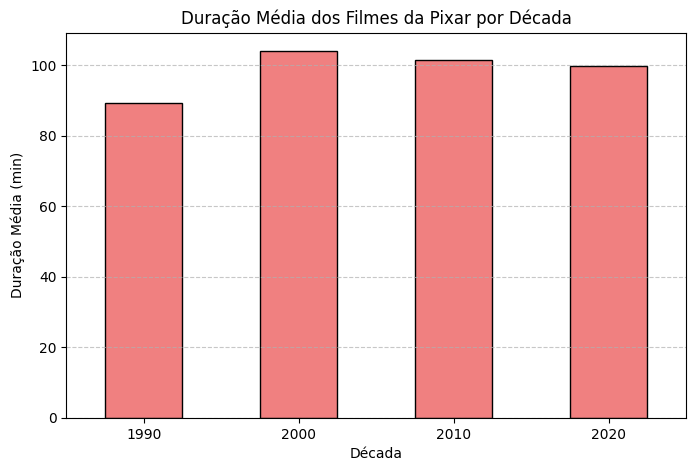

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Média de duração por década
df_runtime = df.groupby('Decada')['run_time'].mean()

# Gráfico de barras
plt.figure(figsize=(8, 5))
df_runtime.plot(kind='bar', color='lightcoral', edgecolor='black')

# Configuração do gráfico
plt.xlabel('Década')
plt.ylabel('Duração Média (min)')
plt.title('Duração Média dos Filmes da Pixar por Década')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()
